In [1]:
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from time import strftime
from datetime import datetime
import matplotlib.ticker as mticker

In [2]:
#read the data in
data = pd.read_csv("condensedata.csv").T

#keep only the columns I'm working on
data = data[[3,4,5]]

#drop the first row with column names
data = data.drop(data.index[0])

#reset the index so it's easier to get the year
data = data.reset_index()

#rename the columns to something easier to understand
data.columns = ["Year","Tax on Int Trade","Tax Revenue","Surface Area"]

#drop empty data fields
#data = data.dropna()

# #check out the data
data.info()
#display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              60 non-null     object
 1   Tax on Int Trade  47 non-null     object
 2   Tax Revenue       47 non-null     object
 3   Surface Area      58 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


In [3]:
quakes = pd.read_csv("earthquakedata.csv")
quakestime = pd.DataFrame(quakes)
quakestime["Time"] = pd.to_datetime(quakestime["Time"],unit='ms')
quakestime = pd.DataFrame(quakestime)
quakestime["Time"] = quakestime["Time"].astype("str")
quakestime["Year"] = pd.DatetimeIndex(quakestime["Time"]).year
quakestime = quakestime[["Year","Magnitude"]]
maxquake = quakestime.groupby("Year")
maxquake = maxquake.max()
maxquake = maxquake.reset_index()
maxquake = maxquake[(maxquake["Year"] > 1960) & (maxquake["Year"]<2019)]
maxquake = maxquake[maxquake["Magnitude"]>6]
maxquake["Year"] = maxquake["Year"].astype(str)
all_data = pd.merge(data,maxquake,on="Year", how="left")

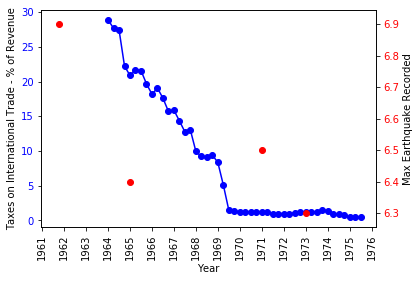

In [4]:
y = all_data["Tax on Int Trade"]
x = all_data["Year"]
y2 = all_data["Magnitude"]
tick_locations = [value for value in x]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y, marker="o", color="blue")
ax2.scatter(x,y2, color="r")
ax1.set_ylabel("Taxes on International Trade - % of Revenue")
ax1.set_xlabel("Year")
#ax1.set_title("Taxes on International Trade by Year ; Largest Earthquake")
ax1.set_xticklabels(all_data["Year"],rotation="vertical")
ax2.set_ylabel("Max Earthquake Recorded")
ax1.tick_params(axis='y', labelcolor = 'blue')
ax2.tick_params(axis = 'y', labelcolor = 'red')
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.show()

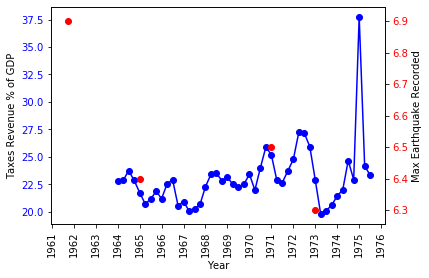

In [5]:
y = all_data["Tax Revenue"]
x = all_data["Year"]
y2 = all_data["Magnitude"]
tick_locations = [value for value in x]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y, color="blue",marker="o")
ax2.scatter(x,y2,color="red", marker="o")
ax1.set_ylabel("Taxes Revenue % of GDP")
ax1.set_xlabel("Year")
#ax1.set_title("Taxes Revenue % of GDP ; Largest Earthquake")
ax1.set_xticklabels(all_data["Year"],rotation="vertical")
ax2.set_ylabel("Max Earthquake Recorded")
ax1.tick_params(axis='y', labelcolor = 'blue')
ax2.tick_params(axis = 'y', labelcolor = 'red')
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.show()

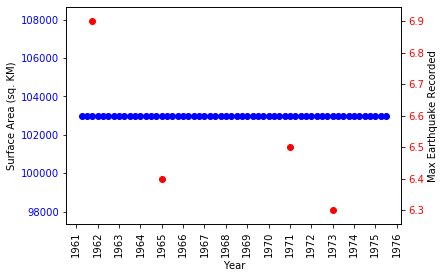

In [6]:
y = all_data["Surface Area"]
x = all_data["Year"]
y2 = all_data["Magnitude"]
tick_locations = [value for value in x]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y, color="blue",marker="o")
ax2.scatter(x,y2,color="r")
ax1.set_ylabel("Surface Area (sq. KM)")
ax1.set_xlabel("Year")
# ax1.set_title("Surface Area ; Largest Earthquake")
ax1.set_xticklabels(all_data["Year"],rotation="vertical")
ax2.set_ylabel("Max Earthquake Recorded")
ax1.tick_params(axis='y', labelcolor = 'blue')
ax2.tick_params(axis = 'y', labelcolor = 'red')
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.show()